# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
#1.The summary statistics table and the bar plot of observed mouse timepoints indicate that Capomulin and Ramicane have the lowest mean tumor volumes (40.68 mm³ and 40.22 mm³, respectively). This suggests that these two drug regimens are the most effective in reducing tumor size among the mice tested. Additionally, the number of observations (timepoints) for these drugs is relatively high, supporting the reliability of these results.
#2.The scatter plot and the linear regression analysis of mouse weight versus average tumor volume for the Capomulin regimen show a positive correlation (correlation coefficient of 0.84). This implies that heavier mice tend to have larger tumor volumes. This could suggest that body weight might influence the effectiveness of the drug, or it might be a confounding factor related to the progression of the tumor.
#3.The box plots and the summary statistics table (including variance, standard deviation, and SEM) reveal differences in the variability of tumor volumes among the different drug regimens. For instance, Ketapril shows a high variance (68.55) and standard deviation (8.28), indicating greater variability in response to the treatment compared to other drugs like Capomulin and Ramicane. This suggests that while some drugs might be effective for certain individuals, their effects could be more unpredictable compared to more consistently effective drugs like Capomulin and Ramicane.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [45]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice['Mouse ID'].unique())

['g989']


In [47]:
# Optional: Get all the data for the duplicate mouse ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = cleaned_data['Mouse ID'].nunique()
print(num_clean_mice)

248


## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_SE

In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary_stats_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

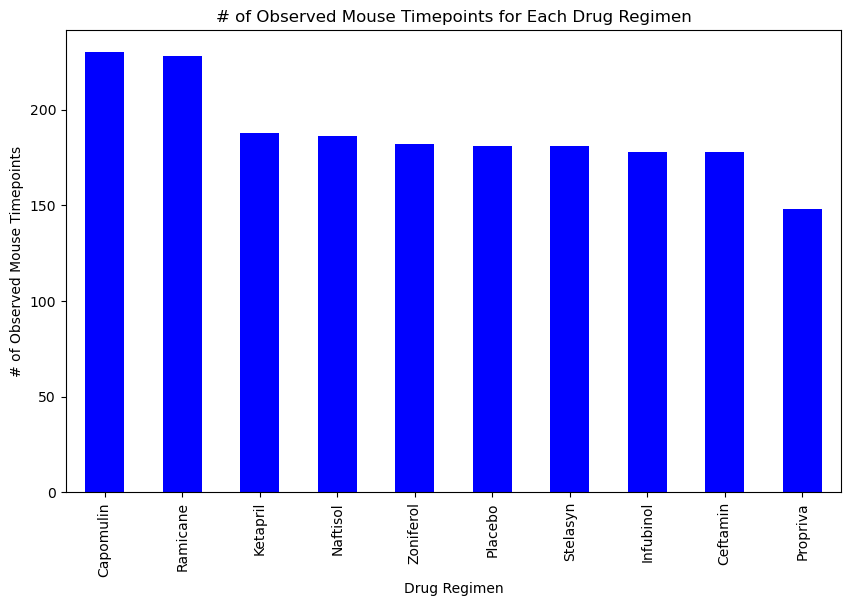

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
timepoint_counts.plot(kind='bar', color='blue')
plt.title('# of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

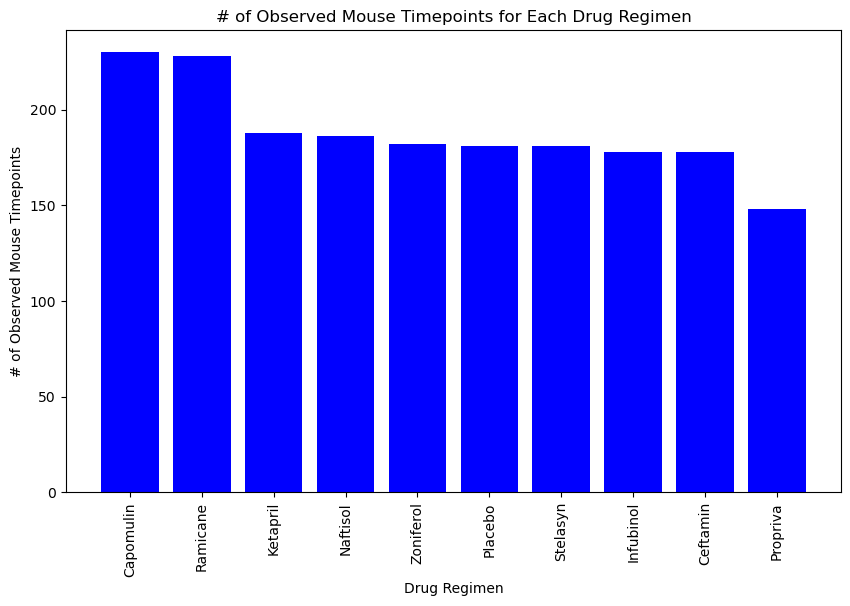

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(timepoint_counts.index, timepoint_counts.values, color='blue')
plt.title('# of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

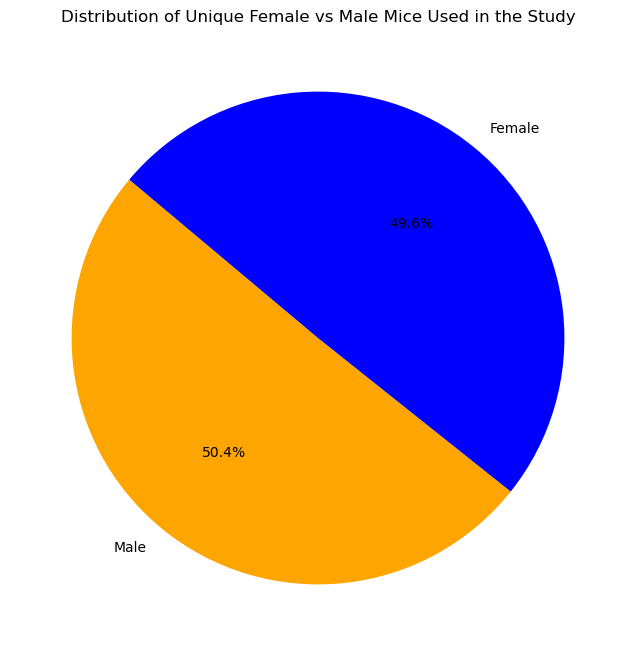

In [54]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
unique_mice_gender = cleaned_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
plt.figure(figsize=(8, 8))
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'blue'])
plt.title('Distribution of Unique Female vs Male Mice Used in the Study')
plt.ylabel('')
plt.show()

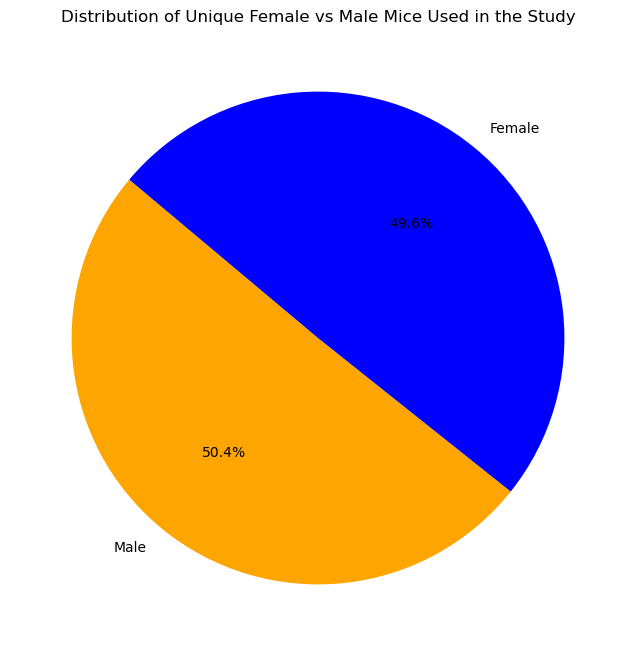

In [55]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
unique_mice_gender = cleaned_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'blue'])
plt.title('Distribution of Unique Female vs Male Mice Used in the Study')
plt.show()


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(regimens)]

last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_data = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'])



In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(drug_data)

    quartiles = drug_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"{drug}'s interquartile range (IQR) is: {iqr}")

    # add subset


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug} outliers: {outliers}")

Capomulin's interquartile range (IQR) is: 7.781863460000004
Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's interquartile range (IQR) is: 9.098536719999998
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's interquartile range (IQR) is: 11.477135160000003
Infubinol outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's interquartile range (IQR) is: 15.577752179999997
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


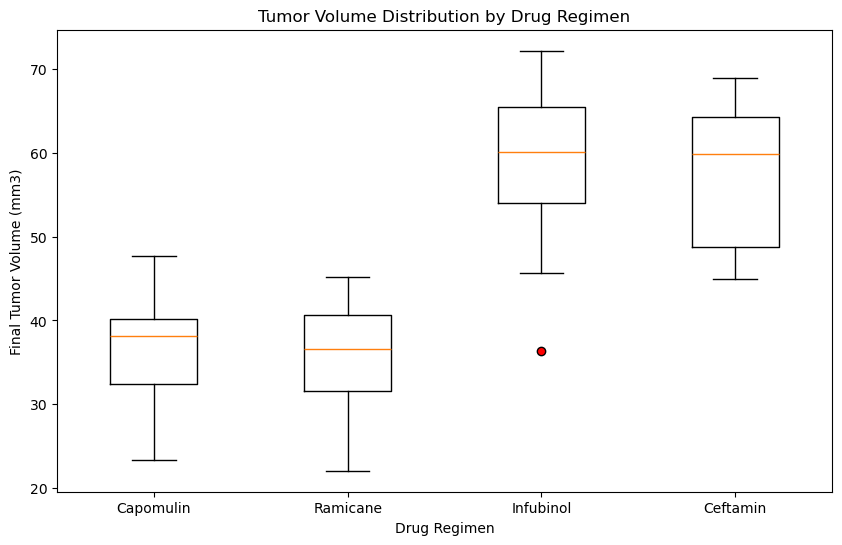

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'r', 'marker': 'o'})
ax.set_title('Tumor Volume Distribution by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

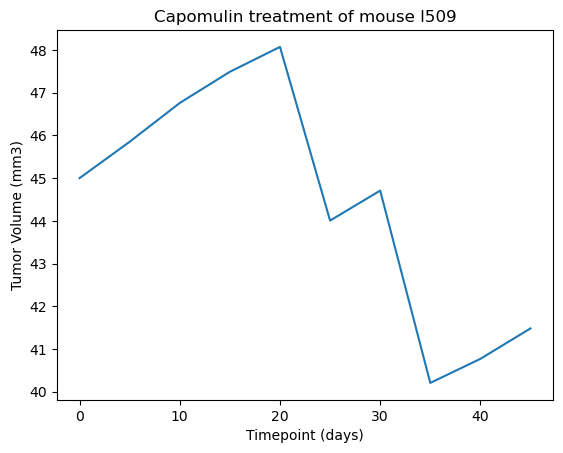

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509'] 
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

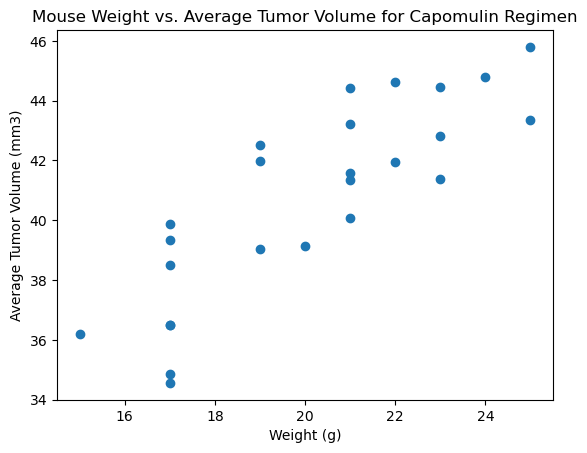

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')
tumor_volume_vs_weight = pd.DataFrame({
    'Average Tumor Volume (mm3)': avg_tumor_volume,
    'Weight (g)': mouse_weight['Weight (g)']
})
plt.scatter(tumor_volume_vs_weight['Weight (g)'], tumor_volume_vs_weight['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


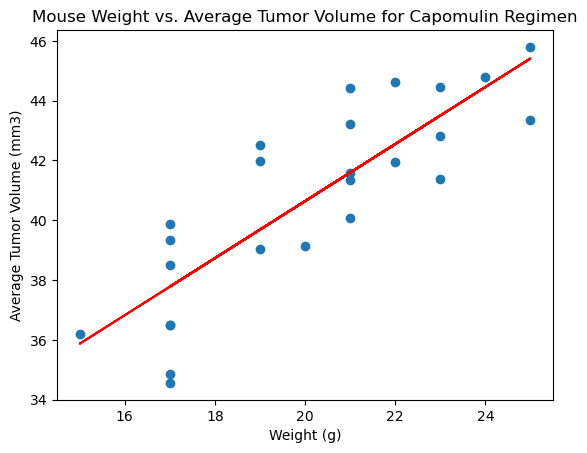

In [61]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(tumor_volume_vs_weight['Weight (g)'], tumor_volume_vs_weight['Average Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")
slope, intercept, r_value, p_value, std_err = st.linregress(tumor_volume_vs_weight['Weight (g)'], tumor_volume_vs_weight['Average Tumor Volume (mm3)'])
regress_values = tumor_volume_vs_weight['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(tumor_volume_vs_weight['Weight (g)'], tumor_volume_vs_weight['Average Tumor Volume (mm3)'])
plt.plot(tumor_volume_vs_weight['Weight (g)'], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()